In [52]:
import pandas as pd
import os
import shutil

In [74]:
# Creating the data for positive samples (Github)

FILE_PATH = "Chest Xray master/metadata.csv"
IMAGES_PATH = "Chest Xray master/images"

In [75]:
df = pd.read_csv(FILE_PATH)
print(df.shape)

(950, 30)


In [76]:
df.head()

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,N,...,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [77]:
TARGET_DIR = "Dataset/covid"

if not os.path.exists(TARGET_DIR):
    os.mkdir(TARGET_DIR)
print("Covid folder created")

Covid folder created


In [79]:
cnt = 0

for (i,row) in df.iterrows():
    if row["finding"]=="Pneumonia/Viral/COVID-19" and row["view"]=="PA":
        filename = row["filename"]
        image_path = os.path.join(IMAGES_PATH,filename)
        image_copy_path = os.path.join(TARGET_DIR,filename)
       
        
        

In [87]:
# Sampling of images from Kaggle

import random
KAGGLE_FILE_PATH ="Chest Xray kaggle/chest_xray/chest_xray/train/NORMAL"
TARGET_NORMAL_DIR ="Dataset/normal"

In [88]:
image_names = os.listdir(KAGGLE_FILE_PATH)

In [89]:
random.shuffle(image_names)

In [91]:
for i in range(196):
    
    image_name = image_names[i]
    image_path = os.path.join(KAGGLE_FILE_PATH,image_name)
    
    target_path = os.path.join(TARGET_NORMAL_DIR,image_name)
    


In [92]:
TRAIN_PATH = "Dataset"
VAL_PATH = "Chest Xray kaggle/chest_xray/test"

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [94]:
# CNN based model in keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation = 'relu',input_shape = (224,224,3)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [100]:
# Train from scratch
train_datagen = image.ImageDataGenerator(
rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,    
horizontal_flip = True,
)  

test_dataset = image.ImageDataGenerator(rescale=1./255)


In [103]:
train_generator = train_datagen.flow_from_directory(
'CovidDataset/CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'


)

Found 224 images belonging to 2 classes.


In [104]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [105]:
validation_generator = test_dataset.flow_from_directory(
   'CovidDataset/CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'

)

Found 60 images belonging to 2 classes.


In [110]:
hist = model.fit_generator(
 train_generator,
    steps_per_epoch=8,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=2



)

Epoch 1/10
8/8 [==============================] - 32s 4s/step - loss: 0.6699 - accuracy: 0.6652 - val_loss: 0.6416 - val_accuracy: 0.9167


In [115]:
model.save("model_adv.h5")

In [116]:
model.evaluate_generator(train_generator)

D:\anaconda\lib\site-packages\keras\engine\training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.6458040475845337, 0.7946428656578064]

In [118]:
model.evaluate_generator(validation_generator)


[0.6416490077972412, 0.9166666865348816]

In [119]:
model = load_model('model_adv.h5')


In [120]:
import os

In [121]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [151]:
y_actual = []
y_test = []

In [152]:
for i in os.listdir("./CovidDataset/CovidDataset/Val/Normal/"):
    img = image.load_img("./CovidDataset/CovidDataset/Val/Normal/"+i, target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = model.predict_classes(img)
    y_test.append(p[0,0])
    y_actual.append(1)


D:\anaconda\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [153]:
for i in os.listdir("./CovidDataset/CovidDataset/Val/Covid/"):
    img = image.load_img("./CovidDataset/CovidDataset/Val/Covid/"+i, target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = model.predict_classes(img)
    y_test.append(p[0,0])
    y_actual.append(0)

In [154]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)


In [155]:
from sklearn.metrics import confusion_matrix

In [156]:
cm = confusion_matrix(y_actual, y_test)

In [157]:
import seaborn as sns


<AxesSubplot:>

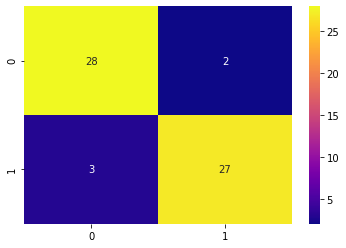

In [158]:
sns.heatmap(cm, cmap="plasma", annot=True)

In [ ]:
#Thus, indeed making it a good prediction model with a good accuracy.
#Thankyou.
